<b>Importing necessary library.</b>

In [2]:
import pandas as pd 
import numpy as np 
import string

import csv
from collections import Counter
import speech_recognition as sr
import nltk 
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer 
import re 

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
#creating a list to store all the audio file
audio_links=[]

#assigning all the audio to different variable names
link_01="Data/case_study_audio/Inter. 01 20220701-000141.wav"
link_02="Data/case_study_audio/Inter. 02 20220701-000223.wav"
link_03="Data/case_study_audio/Inter. 03 20220701-000255.wav"
link_04="Data/case_study_audio/Inter. 04 20220701-000322.wav"
link_05="Data/case_study_audio/Inter. 05 20220701-000345.wav"

#adding the audio files to the audio_links list
audio_links.append(link_01)
audio_links.append(link_02)
audio_links.append(link_03)
audio_links.append(link_04)
audio_links.append(link_05)

In [4]:
#initialize the recognizer 
r=sr.Recognizer()

#creating a list to store all the interview text
interview_list=[]

#run a loop over the audio_links list
for filename in audio_links:
    
    #coverting the audio file into text
    with sr.AudioFile(filename) as source:
        audio_data=r.record(source)
        text=r.recognize_google(audio_data)
        
        #append the text file into the interview list
        interview_list.append(text)

In [5]:
#now load the dataset collected from news,blog,research paper and survey
survey_df=pd.read_csv("Data/case_study_data_01/data_survey_response.csv")
research_df=pd.read_csv("Data/case_study_data_01/data_research paper.csv")
news_df=pd.read_csv("Data/case_study_data_01/data_news_and_blog.csv")

In [6]:
#create a list to store all the survey text
survey_list=[]

#run a loop over the targeted column to append the text in the store
for response in survey_df.loc[:,'How social media influenced you to make online purchase?']:
    survey_list.append(response)
    
#create a list to store all the text collected from research paper 
research_list=[]

#run a loop over the targeted column to append the text in the list 
for response in research_df.loc[:,'description']:
    research_list.append(response)
    
#create a list to store all the text collected from news and blog 
news_list=[]

#run a loop over the targeted column to append the text in the list 
for response in news_df.loc[:,'description']:
    news_list.append(response)
    
#combine all the list and store to a master list
master_list=interview_list+survey_list+research_list+news_list

<b>Let's clean the dataset.</b>

In [7]:
#there is a float element in the list 
for entry in master_list:
    print(type(entry))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [8]:
#now ensuring each element is string
master_list=[str(entry) for entry in master_list]

#let's see each element type of the list
for entry in master_list:
    print(type(entry))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [9]:
#transforming to lowercase letter
list_lower=[text.lower() for text in master_list]

#word tokenize the elements
list_tokenize=[word_tokenize(text) for text in list_lower]

#now let's remove the punctuation from the text
regex=re.compile('[%s]' % re.escape(string.punctuation))
list_no_punctuation=[]

for review in list_tokenize:
    temp_list_01=[]
    for token in review:
        new_token=regex.sub(u'',token)
        if not new_token==u'':
            temp_list_01.append(new_token)
    list_no_punctuation.append(temp_list_01)
    
#now let's remove all the stopwords (unnecessary words)
list_no_stopwords=[]

for review in list_no_punctuation:
    temp_list_02=[]
    for word in review:
        if not word in stopwords.words('english'):
            temp_list_02.append(word)
    list_no_stopwords.append(temp_list_02)
    
#now let's lemmatization the text
wordnet=WordNetLemmatizer()
list_lemmatized=[]

for review in list_no_stopwords:
    temp_list_03=[]
    for word in review:
        temp_list_03.append(wordnet.lemmatize(word))
    list_lemmatized.append(temp_list_03)
    
#now we need to convert the 2D list into normal list and considered it as final list
final_list=[words for review in list_lemmatized for words in review]

In [10]:
#now include all the unique words with frequency in df dataframe
df=pd.DataFrame()
df['word']=Counter(final_list).keys()
df['frequency']=Counter(final_list).values()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2194 entries, 0 to 2193
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   word       2194 non-null   object
 1   frequency  2194 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 34.4+ KB


In [11]:
#create a dictionary of words which will be considered as reasons
target_dict={'price':['price','spent'],'cost of service':['reasonable','cost'],'easy service':['easy','easier','ease','shipping','delivery','convenience'],
            'push to buy':['advertisement','ad','advertised','advertising','advertise','buyable'],'word of mouth':['review','peer','wordofmouth',
                                                                                                                  'suggestion','suggesting','suggests','suggest','recommendation'],
            'customer review':['rating','community','process','satisfaction','satisficers','satisfied','happy','opinion','comment','searchreferral',
                              'service','quality'],
            'product variation':['variety','availability'],'trust':['selection','content','trust','reliable','trustworthy','reputation'],'offers':['promotional','offer'],
            'trend':['trend','exclusive'],'influencers':['influencer','influencers','celebrity','endorse','ambassador'],
            'brand value':['compare','compared']}

#also make indibidual list for each label
price=['price','spent']
cost_of_service=['reasonable','cost']
easy_service=['easy','easier','ease','shipping','delivery','convenience']
push_to_buy=['advertisement','ad','advertised','advertising','advertise','buyable']
word_of_mouth=['review','peer','wordofmouth','suggestion','suggesting','suggests','suggest','recommendation']
customer_review=['rating','community','process','satisfaction','satisficers','satisfied','happy','opinion','comment','searchreferral','service','quality']
product_variation=['variety','availability']
trust=['selection','content','trust','reliable','trustworthy','reputation']
offers=['promotional','offer']
trend=['trend','exclusive']
influencers=['influencer','influencers','celebrity','endorse','ambassador']
brand_value=['compare','compared']

#now make a label list with keys of target_dict
labels=list(target_dict.keys())

#now make a words list with values of target_dict
words=list(target_dict.values())

In [12]:
#now we need to make the list words normal
words_plain=[w for word in words for w in word]

#keep only the targeted word in the dataframe
df=df[df['word'].isin(words_plain)]

#create label column in dataframe
df['label']=''

#now label each row according to the targeted word 
df.loc[df['word'].isin(price),'label']+='Price'
df.loc[df['word'].isin(cost_of_service),'label']+='Cost of Service'
df.loc[df['word'].isin(easy_service),'label']+='Ease of Service'
df.loc[df['word'].isin(push_to_buy),'label']+='Push to Buy'
df.loc[df['word'].isin(word_of_mouth),'label']+='Word of Mouth'
df.loc[df['word'].isin(customer_review),'label']+='Customer Review'
df.loc[df['word'].isin(product_variation),'label']+='Product Variation'
df.loc[df['word'].isin(trust),'label']+='Trust'
df.loc[df['word'].isin(offers),'label']+='Offers'
df.loc[df['word'].isin(trend),'label']+='Trend'
df.loc[df['word'].isin(influencers),'label']+='Influencers'
df.loc[df['word'].isin(brand_value),'label']+='Brand Value'
df.head()

,word,frequency,label
32,price,13,Price
34,easy,14,Ease of Service
35,shipping,2,Ease of Service
36,reasonable,1,Cost of Service
48,advertisement,4,Push to Buy


<b>Let's generate some visualizatin.</b>

In [13]:
#import necessary libraries for visualization
import numpy as np 
import matplotlib.pyplot as plt 

from matplotlib import lines 
from matplotlib import patches 
from matplotlib.patheffects import withStroke

import plotly.express as px

In [14]:
#create a new dataframe containing only the necessary column in necessary order 
df_v01=df.groupby(['label']).sum().sort_values(by='frequency', ascending=True).reset_index()
label=df_v01['label']
frequency=df_v01['frequency']

Text(0.35, 0.925, 'Frequency of Factors')

findfont: Font family ['Econ Sans Cnd'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Econ Sans Cnd'] not found. Falling back to DejaVu Sans.


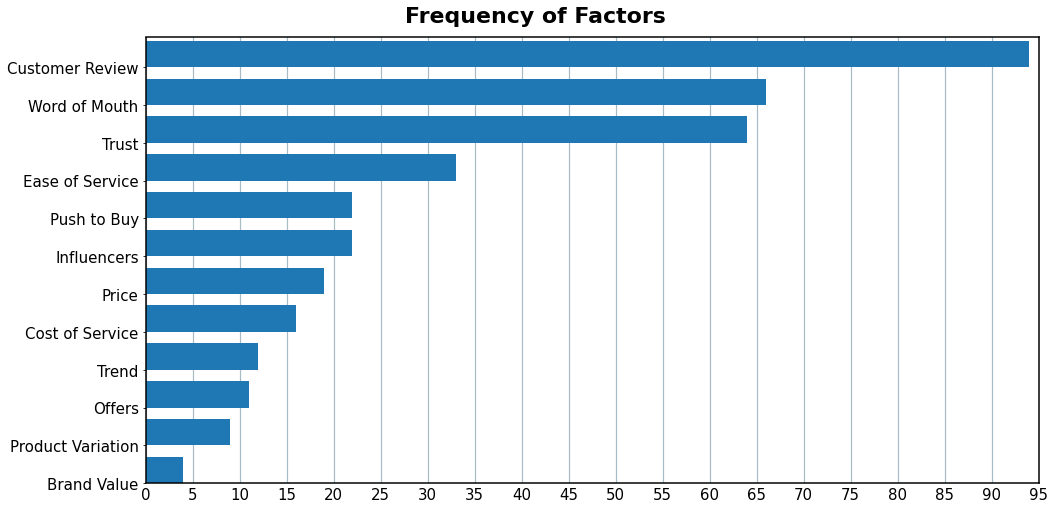

In [15]:
#plotting basic bar chart
fig,ax=plt.subplots(figsize=(16,8))
ax.barh(label,frequency,height=0.70,align='edge')

#customizing the layout
ax.xaxis.set_ticks([i * 5 for i in range(0, 20)])
ax.xaxis.set_ticklabels([i * 5 for i in range(0, 20)], size=15, fontfamily="Econ Sans Cnd", fontweight=100)
ax.xaxis.set_tick_params(labelbottom=True, labeltop=False, length=0)

ax.yaxis.set_ticks([i for i in label])
ax.yaxis.set_ticklabels([i for i in label], size=15, fontfamily="Econ Sans Cnd", fontweight=100)

ax.set_xlim((0, 95))
ax.set_ylim((0, len(label)*1-0.2))

#aligning the axis ticks and gridline
ax.set_axisbelow(True)
ax.grid(axis='x',color="#A8BAC4",lw=1.2)
ax.spines['right'].set_lw(1.5)
ax.spines['left'].set_lw(1.5)
ax.spines['top'].set_lw(1.5)
ax.spines['bottom'].set_lw(1.5)
ax.spines['left'].set_capstyle('butt')

#as there is no room make room for caption on top 
fig.subplots_adjust(top=0.900)

#add title
fig.text(0.350,0.925,'Frequency of Factors',fontsize=22, fontweight='bold', fontfamily='Econ Sans Cnd')

#save the plot 
#fig.savefig("frequency_of_factors.png", dpi=300)

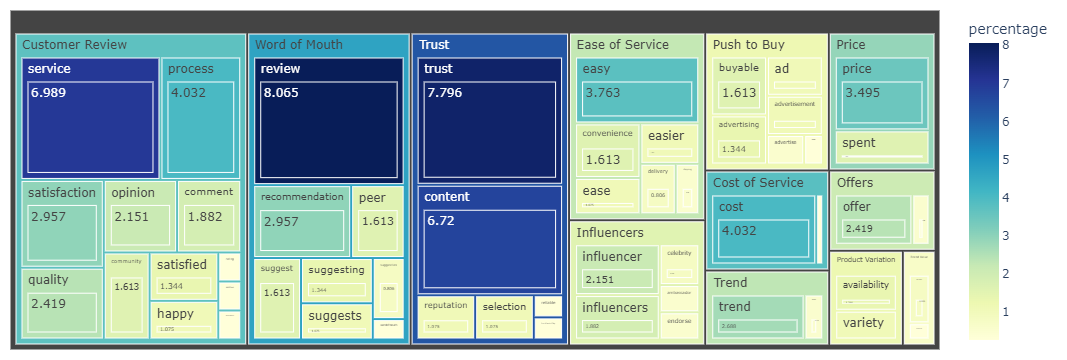

<Figure size 432x288 with 0 Axes>

In [28]:
df['percentage']=(100.*df['frequency']/df['frequency'].sum()).round(3)
fig=px.treemap(df, path=['label','word','percentage'],
              values='percentage',
              color='percentage',
              color_continuous_scale='YlGnBu')

fig.update_layout(margin={'t':10,'l':10,'r':10,'b':10})
fig.show()
plt.savefig("factors break down", dpi=300)